In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Titanic+Data+Set.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Question 1

**What is the number of rows and columns in the data?**

In [3]:
row, col = df.shape

print("There are %d rows and %d columns in the data."%(df.shape))

There are 891 rows and 12 columns in the data.


### Question 2
**Find the total number of missing values in the data.**

In [4]:
total_missing_value = df.isna().sum().sum()

print("There are %d of missing values in the data."%total_missing_value)

There are 866 of missing values in the data.


### Question 3
**Drop the column with the maximum number of missing values and then find the number of missing values in the data.**

In [5]:
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [6]:
df.drop(columns=["Cabin"], inplace=True)
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [7]:
total_missing_value = df.isna().sum().sum()

print("There are %d of missing values in the data."%total_missing_value)

There are 179 of missing values in the data.


### Question 4
**Check the correlation of the variables. Which variables have an absolute correlation value greater than 0.5 with 'Pclass'?**

In [8]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [9]:
df.corr()['Pclass']     #[abs(df.corr()['Pclass'])>0.5]

PassengerId   -0.035144
Survived      -0.338481
Pclass         1.000000
Age           -0.369226
SibSp          0.083081
Parch          0.018443
Fare          -0.549500
Name: Pclass, dtype: float64

### Question 5
<b>Plot a scatterplot for "Age" vs "Sex" with hue = "Survived".
    
Which of the following can be inferred from the graph?</b>

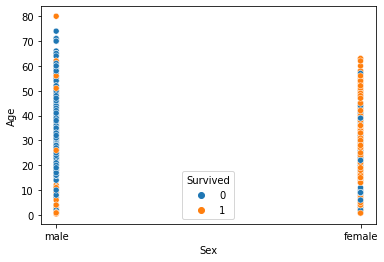

In [10]:
sns.scatterplot(data=df, y="Age", x="Sex", hue="Survived");

**Ans:** *Most of the females survived while only a few males survived.*

### Question 6
**Which of the following statements is correct?**

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1. The mean value of 'Age' of passengers is 25. **False**
2. The value of the standard deviation in 'Pclass' is 1.1 **False**
3. The minimum value of Fare is 0 and maximum value if 512  **True**
4. The max value in 'SibSp' column in 7  **False**


### Question 7

**Which of the following statements is true for the 'Parch' variable?**

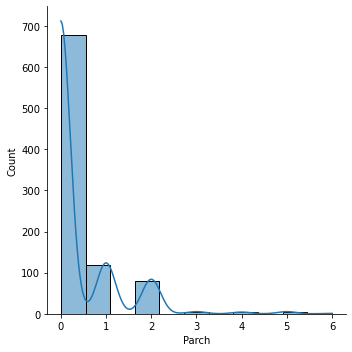

In [12]:
sns.displot(data=df, x="Parch", kde=True);

### Question 8
<b>Which of the following can be inferred from the barplot of 'Pclass' vs 'Age' with hue = 'Survived'?

A. People with the highest age belong to Pclass = 1.

B. Pclass doesn't seem to have much difference on the number of people who survived or not.

C. People with higher age survived less as compared to people with lesser age.

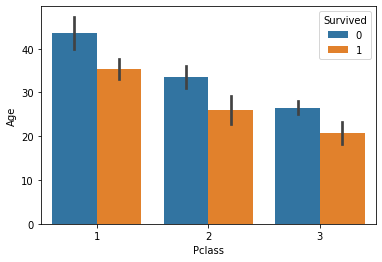

In [13]:
sns.barplot(data=df, y="Age", x='Pclass', hue="Survived");

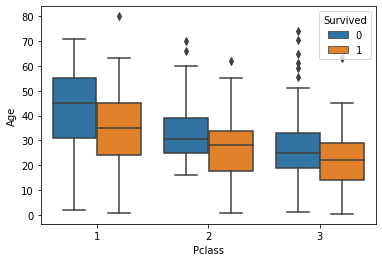

In [14]:
sns.boxplot(data=df, y="Age", x='Pclass', hue="Survived");

### Question 9
Which of the following statement is true?

	Most of the people who survived were from Pclass = 3
	Most of the people who survived were from Pclass = 1
	The ratio of survived = 1 to survived = 0, for Pclass = 3 is greater than 1
	Most of the people who survived were from Pclass = 2

In [15]:
pclass_group = df.groupby('Pclass')

In [16]:
pclass_group[['Survived']].count()

,Survived
Pclass,
1,216
2,184
3,491


In [17]:
pclass_group[['Survived']].sum()/(pclass_group[['Survived']].count() - pclass_group[['Survived']].sum())

,Survived
Pclass,
1,1.700000
2,0.896907
3,0.319892


In [18]:
pclass_group[['Survived']].sum()

,Survived
Pclass,
1,136
2,87
3,119


### Question 10
Which of the following statements can be inferred from the count plot of 'Embarked' with hue = 'Survived'?

    A. Most of the people were from 'Embarked' = S
    B. Most of the people who survived were from 'Embarked' = S
    C. The difference in the number of people who survived and not survived is least for 'Embarked' = S
    D. The least number of observations available are for 'Embarked' = Q

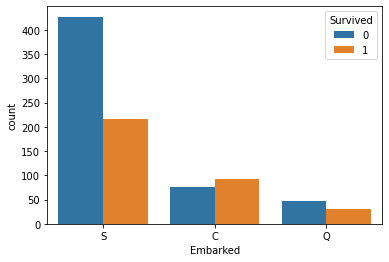

In [19]:
sns.countplot(data=df, x="Embarked", hue = "Survived");

A. True

B. True

C. False

D. True

### Q 11

Which of the following statements can be inferred from the Boxplot of 'Fare' with hue = 'Sex'?


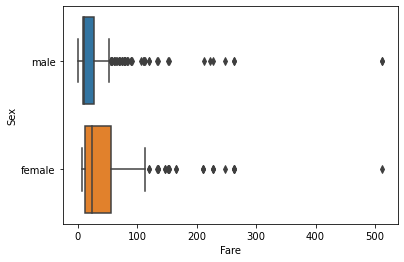

In [20]:
sns.boxplot(data=df, x="Fare", y="Sex");

There are many outliers in the 'Fare' column for both 'female' and 'male'
